In [1]:

import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

from numpy import matlib


In [2]:
# Choose some values for the parameters n and p
p = 0.7
n = 1000

# Generate random picks. Note that this is as if we generated Bernoulli trials 
#   as above, but then just counted the successes in each "experiment"
num_successes = binom.rvs(n,p) # uses the "random variates" method (rvs) of binom

# Print out the results
print(f'{num_successes} successes out of {n} trials, simulated p = {p:.4f}, empirical p = {num_successes/n:.4f}')

712 successes out of 1000 trials, simulated p = 0.7000, empirical p = 0.7120


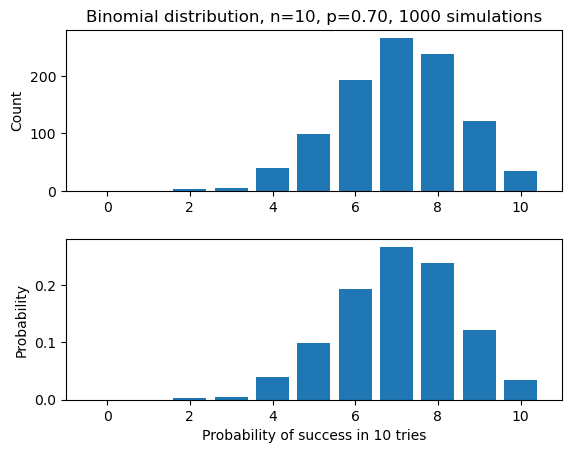

In [3]:

# The full probability distribution describes the probabilty of obtaining each 
#   possible number of successes (k), given n and p. If we set n=10, the the 
#   possible values of k are 0, 1, ..., 10. Now we use binom.rvs to simulate 
#   many different picks to get a full distribution
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Show a bar plot (histogram) of all of the possible outcomes
counts = collections.Counter(outcomes)
plt.subplot(211)
plt.bar(counts.keys(), counts.values())
plt.xlim([-1, n+1])
plt.title(f'Binomial distribution, n={n}, p={p:.2f}, {num_experiments} simulations')
plt.ylabel('Count')

# Show a normalized version that is a pdf. Here counts (the x-axis of the histogram) 
#   is a DISCRETE variable, so we just have to add up the values
normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}
plt.subplot(212)
plt.bar(normalized_counts.keys(), normalized_counts.values())
plt.xlim([-1, n+1])
plt.xlabel(f'Probability of success in {n} tries')
plt.ylabel('Probability')
plt.subplots_adjust(hspace=0.3)

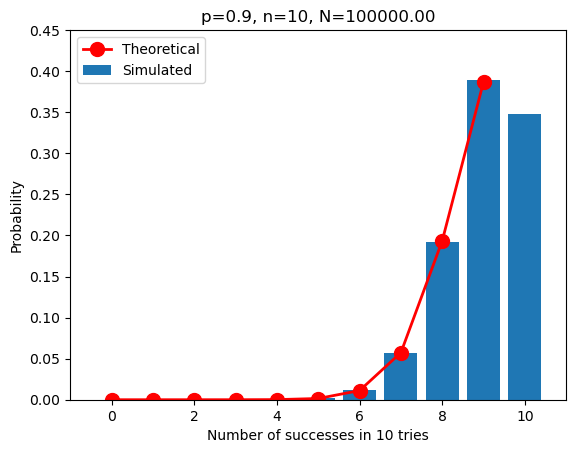

In [4]:

# Now let's make a fun animation showing different values of p and N. 
#   Note that, of course, the more picks you make of the random variable 
#   (higher N), the more closely the outcomes (the "samples") match the true 
#   distribution.
n=10
xs = range(0, n)
f = plt.figure()
for p in np.arange(0, 1, 0.1):
    for N in np.round(np.logspace(1,5,10)):

        # Get the true binomial pdf
        Y = binom.pmf(xs,n,p)

        # Get the random picks, make histogram and normalize
        counts = collections.Counter(binom.rvs(n,p,size=int(N)))
        normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}

        # Show both
        plt.bar(normalized_counts.keys(), normalized_counts.values())
        plt.plot(xs, Y, 'ro-', linewidth=2, markersize=10)
        
        # Labels, etc
        plt.title(f'p={p:.1f}, n={n}, N={N:.2f}')
        plt.xlabel(f'Number of successes in {n} tries')
        plt.ylabel('Probability')
        plt.axis([-1, n+1, 0, 0.45])
        plt.legend(('Theoretical', 'Simulated'))
        plt.show()

        # Wait
        time.sleep(0.1)

        # Clear for next plot
        clear_output(wait=True)


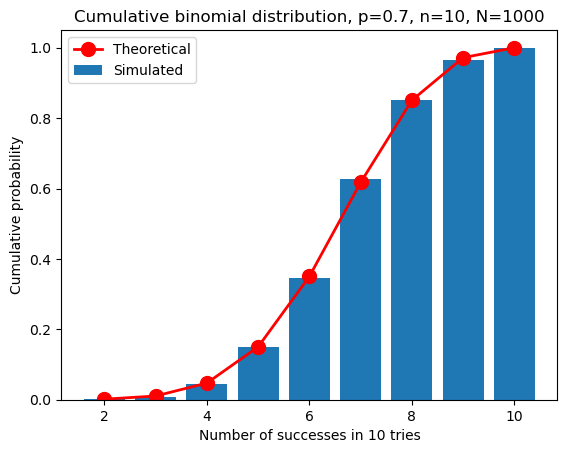

In [6]:

# The cumulative distribution function is just the proability of obtaining an 
#   outcome that is equal to OR LESS THAN a particular value.
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Make histogram
counts = collections.Counter(outcomes)

# Unzip keys from values in a sorted order
keys, values = zip(*sorted(counts.items(), key=itemgetter(0)))

# Compute the cumulative sum of the counts normalized by the total counts (so 
#   it is a probability function and not just a histogram -- note that the final 
#   value in the cdf should equal 1 because every value should be equal to or 
#   less than that value).
total = sum(values)
cumulative_ps = [x/total for x in np.cumsum(values)]

# Plot as a bar graph
plt.bar(keys, cumulative_ps)

# Compare it to the real binomial cumulative distribution, which we find 
#   using binom.cdf
Y = binom.cdf(keys,n,p)
plt.plot(keys, Y, 'ro-', linewidth=2, markersize=10)

# Labels, etc
plt.title(f'Cumulative binomial distribution, p={p:.1f}, n={n}, N={num_experiments}')
plt.xlabel(f'Number of successes in {n} tries')
plt.ylabel('Cumulative probability')
plt.legend(('Theoretical', 'Simulated'))

Exercise 1: 
Assume that there are 10 quanta available in a nerve terminal, and for a given release event each is released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?
For this exercise, I used chatgpt and here is the conversation link:
https://chat.openai.com/share/ec764290-4d78-4f17-9868-12466a117361

In [8]:
import math

def binomial_probability(n, k, p):
    """
    Calculate the binomial probability for the number of successes (k) out of n trials
    with a probability of success (p).
    """
    return (math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k)))

# Parameters
total_quanta = 10
probability_per_quanta = 0.2

# Calculate probabilities for different numbers of quanta being released
probabilities = []
for k in range(total_quanta + 1):
    probability = binomial_probability(total_quanta, k, probability_per_quanta)
    probabilities.append((k, probability))

# Print the probabilities
for k, probability in probabilities:
    print(f"Probability of {k} quanta being released: {probability:.4f}")


Probability of 0 quanta being released: 0.1074
Probability of 1 quanta being released: 0.2684
Probability of 2 quanta being released: 0.3020
Probability of 3 quanta being released: 0.2013
Probability of 4 quanta being released: 0.0881
Probability of 5 quanta being released: 0.0264
Probability of 6 quanta being released: 0.0055
Probability of 7 quanta being released: 0.0008
Probability of 8 quanta being released: 0.0001
Probability of 9 quanta being released: 0.0000
Probability of 10 quanta being released: 0.0000


Exercise 2: 
Let's say you know that a given nerve terminal contains exactly 14 quanta available for release. You have read in the literature that the release probability of these quanta is low, say 0.1. To assess whether this value is reasonable, you run a simple experiment: activate the nerve and measure the number of quanta that are released. The result is 8 quanta. What is the probability that you would get this result (8 quanta) if the true probability of release really was 0.1? What about if the true release probability was much higher; say, 0.7? What about for each decile of release probability (0.1, 0.2, ... 1.0)? Which value of release probability did you determine to be the most probable, given your measurement?

Note: here you are computing a likelihood function: a function describing how the value of the conditional probability p(data | parameters) changes when you hold your data fixed to the value(s) you measured and vary the value(s) of the parameter(s) of, in this case, the binomial distribution. Because you are varying the parameters and not the data, the values of the function are not expected to sum to one (e.g., you can have numerous parameters that have a very high probability of producing the given data) and thus this function is not a probability distribution (see here for an extended discussion). The maximum value of this function is called the maximum likelihood.

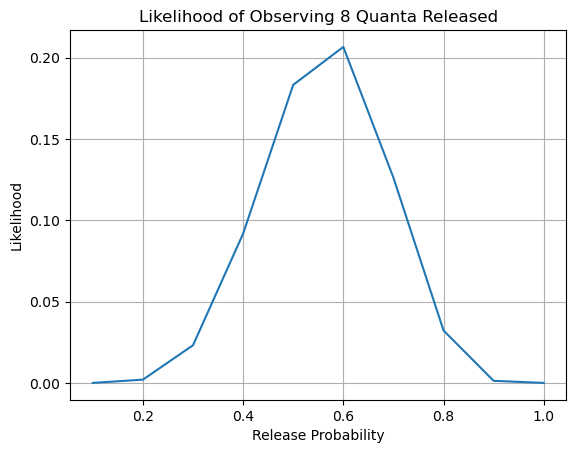

Most probable release probability: 0.6


In [9]:
import math
import matplotlib.pyplot as plt

# Observed data
observed_quanta = 8
total_quanta = 14

# Calculate the likelihood function for different release probabilities
release_probabilities = [i / 10 for i in range(1, 11)]  # [0.1, 0.2, ..., 1.0]
likelihoods = []

for p in release_probabilities:
    likelihood = (math.comb(total_quanta, observed_quanta) *
                  (p ** observed_quanta) * ((1 - p) ** (total_quanta - observed_quanta)))
    likelihoods.append(likelihood)

# Normalize the likelihoods (optional)
sum_likelihoods = sum(likelihoods)
normalized_likelihoods = [likelihood / sum_likelihoods for likelihood in likelihoods]

# Plot the likelihood function
plt.plot(release_probabilities, likelihoods)
plt.xlabel('Release Probability')
plt.ylabel('Likelihood')
plt.title('Likelihood of Observing 8 Quanta Released')
plt.grid(True)
plt.show()

# Determine the release probability with the highest likelihood
most_probable_release_probability = release_probabilities[likelihoods.index(max(likelihoods))]
print(f"Most probable release probability: {most_probable_release_probability:.1f}")


Exercise 3:
Not feeling convinced by your single experiment (good scientist!), you repeat it under identical conditions. This time you measure 5 quanta that were released. Your sample size has now doubled, to two measurements. You now want to take into account both measurements when you assess the likelihoods of different possible values of the underlying release probability. To do so, assume that the two measurements in this sample are independent of one another; that is, the value of each result had no bearing on the other. In this case, the total likelihood is simply the product of the likelihoods associated with each separate measurement. It is also typical to compute the logarithm of each likelihood and take their sum, which is often more convenient. What are the values of the total likelihood and total log-likelihood in this example, if we assume that the true release probability is 0.1?

Of course, knowing those values of the likelihood and log-likelihood is not particularly useful until you can compare them to the values computed for other possible values for the release probability, so you can determine which value of release probability is most likely, given the data. Therefore, compute the full likelihood and log-likelihood functions using deciles of release probability between 0 and 1. What is the maximum value? Can you improve your estimate by computing the functions at a higher resolution? How does the estimate improve as you increase the sample size?

The estimates can improve and be less sensitive to small variations in release probability when the sample size increases. Also, haaving a higher resolution can also provide a more precise estimate. So, you would be using more points in the range between 0 and 1. 

In [18]:
import math

# Observed data
k1 = 8 #K1 observed_quanta_experiment1
k2 = 5 #K2 observed_quanta_experiment2
n = 14 #n total_quanta

# True release probability
p = 0.1 #p true_release_probability

# Calculate the likelihood for each experiment

likelihood_k1 = (n/k1 ) * (p ** k1) * ((1 - p) ** (n-k1))

likelihood_k2 = (n/k2 ) * (p ** k2) * ((1 - p) ** (n-k2))

# Calculate the total likelihood (product of individual likelihoods)
total_likelihood = likelihood_k1 * likelihood_k2

# Calculate the total log-likelihood (sum of individual log-likelihoods)
total_log_likelihood = math.log(likelihood_k1) + math.log(likelihood_k2)

print(f"Total Likelihood: {total_likelihood:.10f}")
print(f"Total Log-Likelihood: {total_log_likelihood:.10f}")


Total Likelihood: 0.0000000000
Total Log-Likelihood: -29.9247787387


Maximum Likelihood: 0.0000000183 (Release Probability: 0.50)
Maximum Log-Likelihood: -17.8188858506 (Release Probability: 0.50)


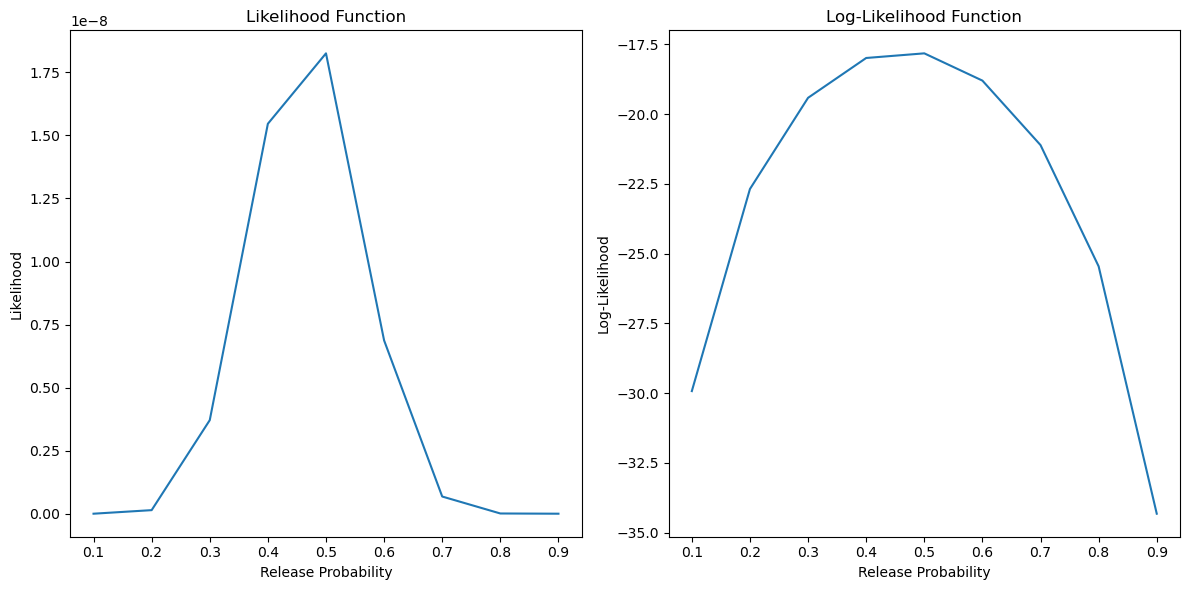

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

# Create an array of release probabilities
release_probabilities = list(np.arange(0.1, 1.0, 0.1))  # p_values between 0 and 1

# Initialize arrays to store likelihoods and log-likelihoods
likelihoods = []
log_likelihoods = []

# Observed data
k1 = 8 #K1 observed_quanta_experiment1
k2 = 5 #K2 observed_quanta_experiment2
n = 14 #n total_quanta

# Calculate likelihood and log-likelihood for each release probability
for p in release_probabilities:
    likelihood_k1 = (n/k1 ) * (p ** k1) * ((1 - p) ** (n-k1))
    
    likelihood_k2 = (n/k2 ) * (p ** k2) * ((1 - p) ** (n-k2))

    total_likelihood = likelihood_k1 * likelihood_k2
    log_likelihood = m.log(likelihood_k1) + m.log(likelihood_k2)
    
    likelihoods.append(total_likelihood)
    log_likelihoods.append(log_likelihood)

# Find the maximum values
max_likelihood = max(likelihoods)
max_log_likelihood = max(log_likelihoods)
max_likelihood_index = likelihoods.index(max_likelihood)
max_log_likelihood_index = log_likelihoods.index(max_log_likelihood)
optimal_release_probability_likelihood = release_probabilities[max_likelihood_index]
optimal_release_probability_log_likelihood = release_probabilities[max_log_likelihood_index]

print(f"Maximum Likelihood: {max_likelihood:.10f} (Release Probability: {optimal_release_probability_likelihood:.2f})")
print(f"Maximum Log-Likelihood: {max_log_likelihood:.10f} (Release Probability: {optimal_release_probability_log_likelihood:.2f})")

# Plot the likelihood and log-likelihood functions
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(release_probabilities, likelihoods)
plt.xlabel('Release Probability')
plt.ylabel('Likelihood')
plt.title('Likelihood Function')

plt.subplot(122)
plt.plot(release_probabilities, log_likelihoods)
plt.xlabel('Release Probability')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood Function')

plt.tight_layout()
plt.show()


Exercise 4:
You keep going and conduct 100 separate experiments and end up with these results:

Measured releases	Count
0	0
1	0
2	3
4	10
5	19
6	26
7	16
8	16
9	5
10	5
11	0
12	0
13	0
14	0
What is the most likely value of p (which we typically refer to as p^, which is pronounced as "p-hat" and represents the maximum-likelihood estimate of a parameter in the population given our sample with a resolution of 0.01?

BONUS: Use a fitting procedure to find p-hat.

For exercise 4 and 5, I used chatgfpt and here is the conversation link: https://chat.openai.com/share/ce225231-faff-4edc-a7cf-5229dd0969e0

In [34]:

# Define your data
data = [(3, 2), (10, 4), (19, 5), (26, 6), (16, 7), (16, 8), (5, 9), (10, 10)]

# Calculate the sums of count and measured releases
count_sum = sum(pair[1] for pair in data)
measured_releases_sum = sum(pair[0] for pair in data)

# Calculate the MLE
p_hat = count_sum / measured_releases_sum

# Round p-hat to the desired resolution (0.01)
resolution = 0.01
rounded_p_hat = round(p_hat / resolution) * resolution

print("Maximum-Likelihood Estimate (p-hat):", rounded_p_hat)


Maximum-Likelihood Estimate (p-hat): 0.49


Exercise 5:
Let's say that you have run an exhaustive set of experiments on this synapse and have determined that the true release probability is 0.3 (within some very small tolerance). Now you want to test whether changing the temperature of the preparation affects the release probability. So you change the temperature, perform the experiment, and measure 7 quantal events for the same 14 available quanta. Compute p-hat. Standard statistical inference now asks the question, what is the probability that you would have obtained that measurement given a Null Hypothesis of no effect? In this case, no effect corresponds to an unchanged value of the true release probability (i.e., its value remained at 0.3 even with the temperature change). What is the probability that you would have gotten that measurement if your Null Hypothesis were true? Can you conclude that temperature had an effect?



In [35]:

# Updated data for the new temperature conditions
new_data = [(14, 7)]

# Calculate the sums of count and measured releases for the new data
new_count_sum = sum(pair[1] for pair in new_data)
new_measured_releases_sum = sum(pair[0] for pair in new_data)

# Calculate the new MLE
new_p_hat = new_count_sum / new_measured_releases_sum

# Round new p-hat to the desired resolution (0.01)
resolution = 0.01
rounded_new_p_hat = round(new_p_hat / resolution) * resolution

print("New Maximum-Likelihood Estimate (p-hat) for changed temperature conditions:", rounded_new_p_hat)


New Maximum-Likelihood Estimate (p-hat) for changed temperature conditions: 0.5


In [36]:
import scipy.stats as stats

# Observed data for the new temperature conditions
observed_count = 7
total_available_quanta = 14

# Null hypothesis: True release probability remains at 0.3
null_p = 0.3

# Calculate the expected count under the null hypothesis
expected_count = total_available_quanta * null_p

# Perform a chi-squared test to determine if the observed data is significantly different
# from the expected data under the null hypothesis
chi_squared_stat = ((observed_count - expected_count) ** 2) / expected_count
p_value = 1 - stats.chi2.cdf(chi_squared_stat, df=1)  # df=1 for a one-tailed test

# Set the significance level (alpha)
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis. Temperature had an effect.")
else:
    print("Fail to reject the null hypothesis. No evidence that temperature had an effect.")


Fail to reject the null hypothesis. No evidence that temperature had an effect.
